<a href="https://colab.research.google.com/github/vkumar61/MAT421/blob/main/Module_H_Section_22_4_22_5%2C_22_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Numerical Error and Stability

Integration schemes for ODEs are evaluated based on accuracy, reflecting their ability to approximate the unknown eact solution, typically denoted as $O(h^p)$, and stability, indicating whether errors grow or remain bounded over time. Stability is crucial for ensuring the reliability f integration schemes, with some schemes being stable only for specific step sizes while unstable for others.

It is easy to show that this is the case for forward difference methods. Below I show that the second order forward difference is unstable for the trivial y' = 0, y(0) = 1.

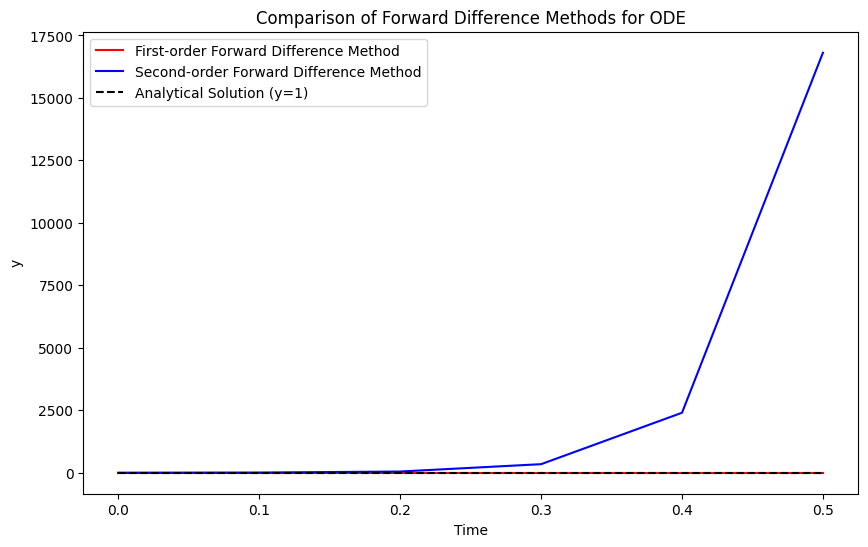

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def f(t, y):
    return 0

def first_order_forward_difference(y_j, t_j, h):
    return y_j + h * f(t_j, y_j)

def second_order_forward_difference(y_j, y_j1, t_j, h):
    return 4 * y_j1 + 3 * y_j + 2 * h * f(t_j, y_j)

y_init = 1.0
t_init = 0.0
t_final = 0.5
h = 0.1
num_steps = int((t_final - t_init) / h)

def analytical_solution(t):
    return y_init * np.ones_like(t)

plt.figure(figsize=(10, 6))

y_values_first_order = [y_init]
t_values_first_order = [t_init]
for i in range(num_steps):
    y_new = first_order_forward_difference(y_values_first_order[-1], t_values_first_order[-1], h)
    y_values_first_order.append(y_new)
    t_values_first_order.append(t_values_first_order[-1] + h)

y_values_second_order = [y_init]
t_values_second_order = [t_init]
for i in range(num_steps):
    y_new = second_order_forward_difference(y_values_second_order[-1], y_values_second_order[-1], t_values_second_order[-1], h)
    y_values_second_order.append(y_new)
    t_values_second_order.append(t_values_second_order[-1] + h)

plt.plot(t_values_first_order, y_values_first_order, label='First-order Forward Difference Method', color='red')
plt.plot(t_values_second_order, y_values_second_order, label='Second-order Forward Difference Method', color='blue')

t_values_analytical = np.linspace(t_init, t_final, 1000)
plt.plot(t_values_analytical, analytical_solution(t_values_analytical), label='Analytical Solution (y=1)', color='black', linestyle='--')

plt.xlabel('Time')
plt.ylabel('y')
plt.title('Comparison of Forward Difference Methods for ODE')
plt.legend()

### Predictor-Corrector Methods

When solving ODEs of the form $F(t, S(t))=\frac{dS(t)}{dt}$ numerical approximations of the interval over an interval of size $h$ will inevitibly accumulate error, as we have seen above in the Euler methods. In fact we see that the error is highly deendent on the interval size. Intuitively this means we should make the interval as small as possible and we will minimize the error. The issue with this is computational expense that grows very rapidly as the interval size is reduced. Aother idea is what if we just used higher derivatives from the tayloer expansion to approximate the function. But many times higher order derivatives are unavailable. What if there was a way to numerically approximate the function and its derivatives at smaller intervals? That is exactly the motivation for predictor corrector methods. They achieve better accuracy by utilizing multiple predictions from $F$ at different locations and subsequently combining them through a weighted average to refine the state update.

A very popular group of these methods are the Runge-Kutta methods. While the Euler method employs the first two terms of the Taylor series for numerical integration, resulting in linear approximation, RK methods aim for enhanced accuracy by retaining additional tems of the series.

To achieve this heightened accuracy without the need for calculating higher-order derivatives explicitly, RK methods employ truncated Taylor series.

#### Second-order Runge-Kutta Method

Given $ \frac{dS(t)}{dt} = F(t, S(t)) $, we assume an integration formula of the form:

$$ S(t+h) = S(t) + c_1F(t,S(t))h + c_2F\left[t+ph,S(t)+qhF(t,S(t))\right]h $$

We determine parameters $ c_1 $, $ c_2 $, $ p $, and $ q $ by matching this equation to the second-order Taylor series:

$$ S(t+h) = S(t) + S'(t)h + \frac{1}{2}!S''(t)h^2 = S(t) + F(t,S(t))h + \frac{1}{2}!F'(t,S(t))h^2 $$

We then simplify and compare to obtain $ c_1 + c_2 = 1 $, $ c_2p = \frac{1}{2} $, and $ c_2q = \frac{1}{2} $. By choosing $ c_1 = \frac{1}{2} $, $ c_2 = \frac{1}{2} $, $ p = 1 $, and $ q = 1 $, we can esablish the second-order RK method.

#### Fourth-order Runge-Kutta Method

The RK4 method, a classical technique for integrating ODEs with high accuracy, employs four points $ k_1 $, $ k_2 $, $ k_3 $, and $ k_4 $. A weighted average of these points yields the approximation of the solution.

The formula for RK4 is:

$$ k_1 = F(t_j, S(t_j)), $$
$$ k_2 = F\left(t_j+\frac{h}{2}, S(t_j)+\frac{1}{2}k_1h\right), $$
$$ k_3 = F\left(t_j+\frac{h}{2}, S(t_j)+\frac{1}{2}k_2h\right), $$
$$ k_4 = F(t_j+h, S(t_j)+k_3h). $$

Consequently, we compute:

$$ S(t_{j+1}) = S(t_j) + \frac{h}{6}(k_1 + 2k_2 + 2k_3 + k_4). $$

The RK4 method exhibits fourth-order accuracy, denoted as $ O(h^4) $.
I compare RK2 and RK4 below:

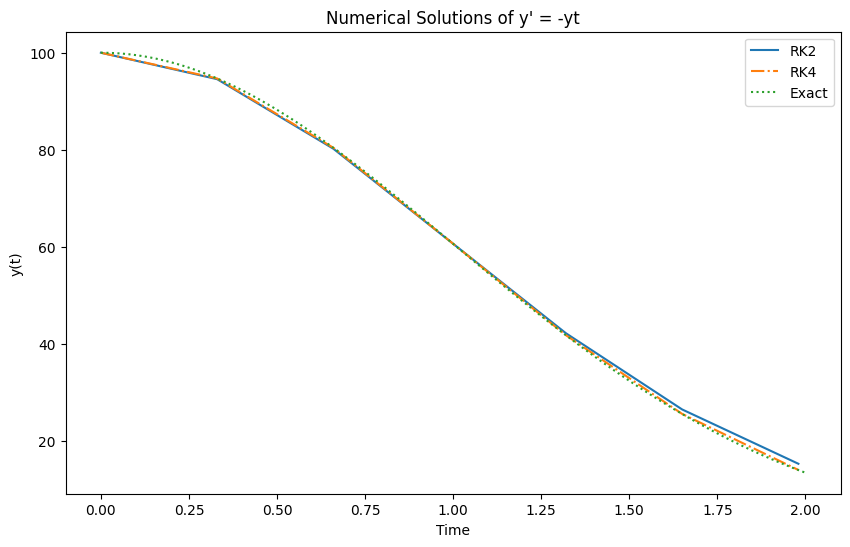

In [2]:
def f(t, y):
    return -y * t

def exact_solution(t, y0):
    return y0 * np.exp(-0.5 * t ** 2)

def rk2(t0, y0, h, num_steps):
    t_values = [t0]
    y_values = [y0]
    for _ in range(num_steps):
        k1 = f(t_values[-1], y_values[-1])
        k2 = f(t_values[-1] + h, y_values[-1] + h * k1)
        y_new = y_values[-1] + 0.5 * h * (k1 + k2)
        t_values.append(t_values[-1] + h)
        y_values.append(y_new)
    return t_values, y_values

def rk4(t0, y0, h, num_steps):
    t_values = [t0]
    y_values = [y0]
    for _ in range(num_steps):
        k1 = f(t_values[-1], y_values[-1])
        k2 = f(t_values[-1] + 0.5 * h, y_values[-1] + 0.5 * h * k1)
        k3 = f(t_values[-1] + 0.5 * h, y_values[-1] + 0.5 * h * k2)
        k4 = f(t_values[-1] + h, y_values[-1] + h * k3)
        y_new = y_values[-1] + h * (k1 + 2*k2 + 2*k3 + k4) / 6
        t_values.append(t_values[-1] + h)
        y_values.append(y_new)
    return t_values, y_values

y0 = 100.0

t0 = 0.0
t_final = 2.0
h = 0.33
num_steps = int((t_final - t0) / h)

t_rk2, y_rk2 = rk2(t0, y0, h, num_steps)
t_rk4, y_rk4 = rk4(t0, y0, h, num_steps)

t_exact = np.linspace(t0, t_final, 100)
y_exact = exact_solution(t_exact, y0)

plt.figure(figsize=(10, 6))
plt.plot(t_rk2, y_rk2, label='RK2')
plt.plot(t_rk4, y_rk4, label='RK4', linestyle = 'dashdot')
plt.plot(t_exact, y_exact, label='Exact', linestyle = 'dotted')
plt.xlabel('Time')
plt.ylabel('y(t)')
plt.title("Numerical Solutions of y' = -yt")
plt.legend()